Train size: 160
Test size: 40


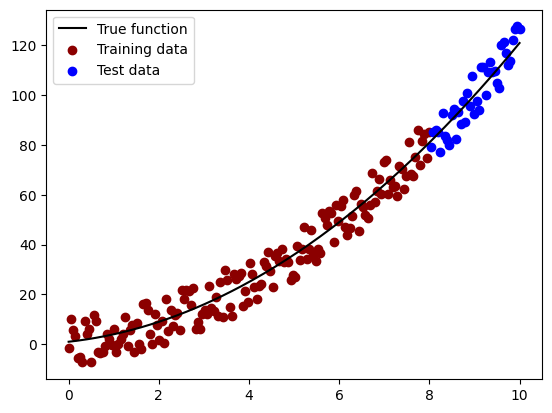

In [9]:
def f(x):
    return x**2 + 2*x + 1

# Plot using matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the true function
def f(x):
    return x**2 + 2*x + 1

# Generate data
np.random.seed(42)
x = np.linspace(0, 10, 200)
y_true = f(x)
y_data = y_true + np.random.uniform(-10, 10, size=x.shape)

# split into training and test datasets (80% training, 20% test) 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_data, test_size=0.2,shuffle=False)
print(f'Train size: {len(x_train)}')
print(f'Test size: {len(x_test)}')

# Plot the data and the true function, coloring the training and test data differently
plt.plot(x, y_true,color='black', label='True function')
plt.scatter(x_train, y_train, color='darkred', label='Training data')
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.legend()
plt.savefig('fig1.png')
plt.show()


In [10]:
# Linear model
def linear_model(x, w, b):
    return w * x + b

In [11]:
import random 

# Initialize parameters
w = random.uniform(-1, 1)  # Random initial weight
b = random.uniform(-1, 1)  # Random initial bias

print(f'Initial weight: {w}')
print(f'Initial bias: {b}')

Initial weight: 0.1648744017313719
Initial bias: -0.8279144369003477


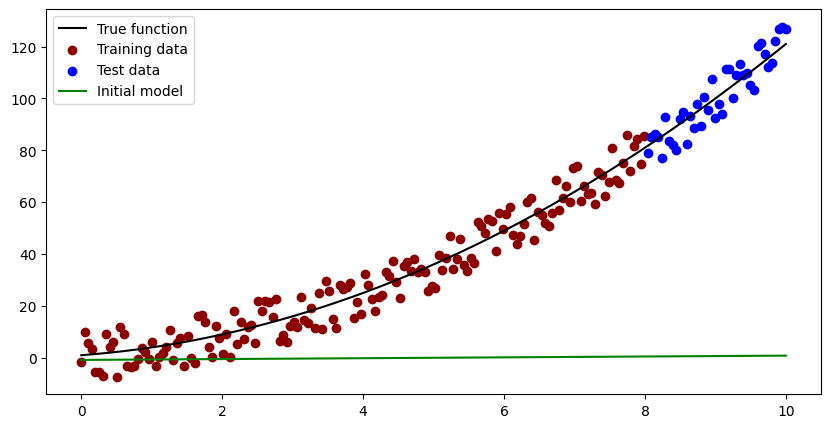

In [12]:
# Linear model
def linear_model(x, w, b):
    return w * x + b

y_pred = [linear_model(p, w, b) for p in x]

plt.figure(figsize=(10, 5))
plt.plot(x, y_true, color='black', label='True function')
plt.scatter(x_train, y_train, color='darkred', label='Training data')
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.plot(x, y_pred, color='green', label='Initial model')
plt.legend()
plt.savefig('fig2.png')
plt.show()

In [16]:
# Mean Squared Error Loss
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

# Compute predictions for the training data
y_pred_train = [linear_model(p, w, b) for p in x_train]

print(f'50th sample target: {y_train[50]}')
print(f'50th prediction: {y_pred_train[50]}')
print(f'Loss at 50th sample: {mse_loss(y_pred_train[50], y_train[50])}')

print('Total Loss over all samples:', mse_loss(np.array(y_pred_train), np.array(y_train)))

50th sample target: 21.729790078081002
50th prediction: -0.4136571461180062
Loss at 50th sample: 490.33225497088677
Total Loss over all samples: 1489.2472344345101


In [17]:
# Compute gradients
def compute_gradients(x, y_true, w, b):
    y_pred = linear_model(x, w, b)
    error = y_pred - y_true
    dw = 2 * np.mean(error * x)
    db = 2 * np.mean(error)
    return dw, db

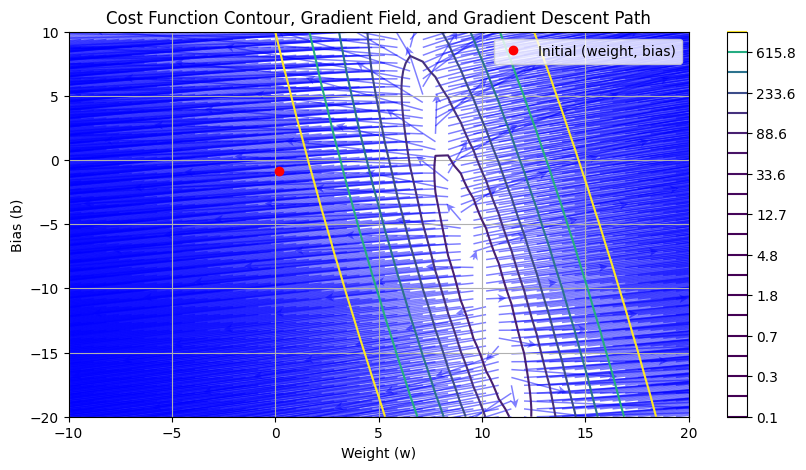

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent parameters
alpha = 0.001  # Learning rate
epochs = 1000  # Number of iterations

# Create a grid of w and b values for contour and quiver plotting
w_vals = np.linspace(-10, 20, 50)
b_vals = np.linspace(-20, 10, 50)
W, B = np.meshgrid(w_vals, b_vals)

# Compute the loss for each combination of w and b in the grid
Z = np.array([mse_loss(linear_model(x_train, w, b), y_train) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)

# Compute the gradient field
dW = np.zeros(W.shape)
dB = np.zeros(B.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        dw, db = compute_gradients(x_train, y_train, W[i, j], B[i, j])
        dW[i, j] = dw
        dB[i, j] = db

# Plot the cost function contour, gradient field, and gradient descent path
plt.figure(figsize=(10, 5))

# Contour plot of the loss function
cp = plt.contour(W, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.colorbar(cp)
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Cost Function Contour, Gradient Field, and Gradient Descent Path')

# Quiver plot of the gradient field
plt.quiver(W, B, dW, dB, angles='xy', scale_units='xy', scale=2, color='blue', alpha=0.5,headwidth=6, headlength=6)
# plot initial weight, bias
plt.plot(w, b, 'ro', label='Initial (weight, bias)')
plt.legend()
plt.grid(True)

plt.savefig('gradient-field-1.png')

plt.show()

Initial (weight, bias): (0.1648744017313719, -0.8279144369003477)
Final (weight, bias): (8.792145018946506, -3.596597018086305)


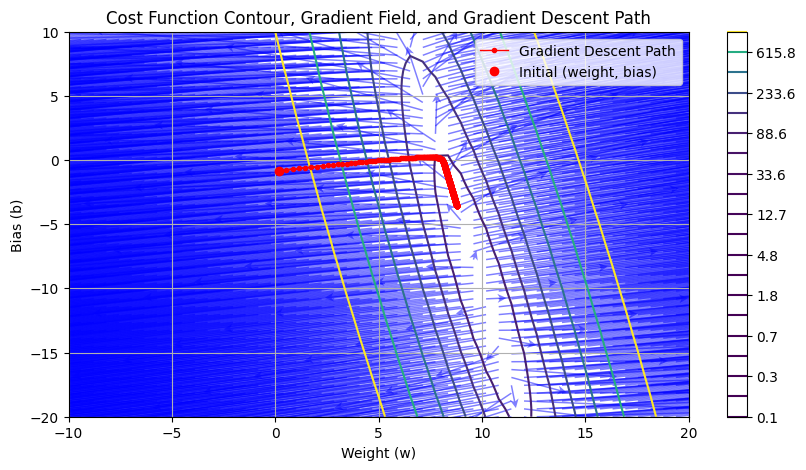

In [19]:
# Store parameters for plotting
w_history = [w]
b_history = [b]
loss_history = [mse_loss(linear_model(x_train, w, b), y_train)]

# Gradient Descent loop
for epoch in range(epochs):
    dw, db = compute_gradients(x_train, y_train, w, b) 
    w = w - alpha * dw # Update the weight
    b = b - alpha * db # Update the bias

    w_history.append(w) # Add to weight tracker
    b_history.append(b) # Add to bias tracker
    loss_history.append(mse_loss(linear_model(x_train, w, b), y_train)) # Add overall loss to loss tracker

# Convert history lists to numpy arrays for easier slicing
w_history = np.array(w_history)
b_history = np.array(b_history)

# Compute the loss for each combination of w and b in the grid
Z = np.array([mse_loss(linear_model(x_train, w, b), y_train) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)

# Compute the gradient field
dW = np.zeros(W.shape)
dB = np.zeros(B.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        dw, db = compute_gradients(x_train, y_train, W[i, j], B[i, j])
        dW[i, j] = dw
        dB[i, j] = db

# Print initial (weight, bias)
print(f'Initial (weight, bias): ({w_history[0]}, {b_history[0]})')
# Print final (weight, bias)
print(f'Final (weight, bias): ({w_history[-1]}, {b_history[-1]})')

# Plot the cost function contour, gradient field, and gradient descent path
plt.figure(figsize=(10, 5))

# Contour plot of the loss function
cp = plt.contour(W, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.colorbar(cp)
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Cost Function Contour, Gradient Field, and Gradient Descent Path')

# Quiver plot of the gradient field
plt.quiver(W, B, dW, dB, angles='xy', scale_units='xy', scale=2, color='blue', alpha=0.5,headwidth=6, headlength=6)

# Plot the gradient descent path
plt.plot(w_history, b_history, 'ro-', markersize=3, linewidth=1, label='Gradient Descent Path')
# Plot the initial weight, bias
plt.plot(w_history[0], b_history[0], 'ro', label='Initial (weight, bias)')

# Add arrows to indicate direction of descent
for i in range(1, len(w_history)):
    plt.arrow(w_history[i-1], b_history[i-1],
                w_history[i] - w_history[i-1],
                b_history[i] - b_history[i-1],
                head_width=0.05, head_length=0.1, fc='red', ec='red')

plt.legend()
plt.grid(True)
plt.savefig('gradient-field-2.png')
plt.show()


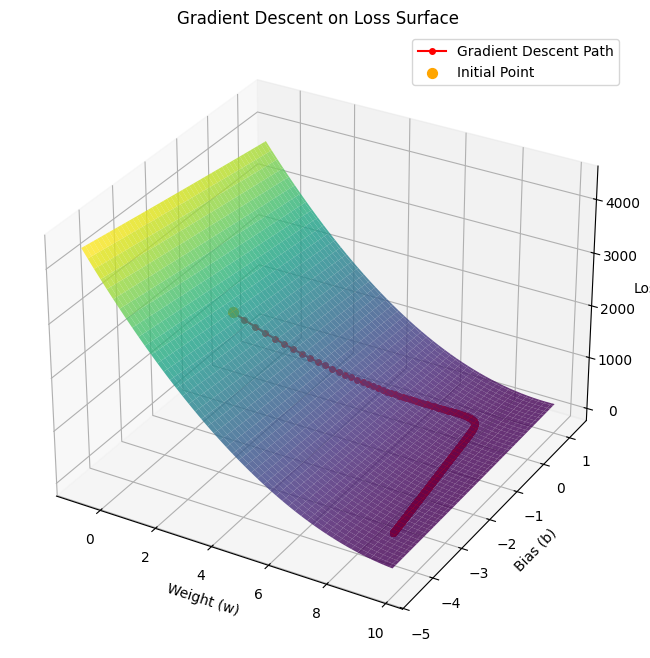

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming w_history, b_history, loss_history, x, and y_data are already defined
# Create a grid of w and b values for contour plotting
w_vals = np.linspace(min(w_history) - 1, max(w_history) + 1, 100)
b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
W, B = np.meshgrid(w_vals, b_vals)

# Compute the loss for each combination of w and b in the grid
Z = np.array([mse_loss(linear_model(x, w, b), y_data) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)

# Plot the gradient descent path
ax.plot(w_history, b_history, loss_history, color='red', marker='o', markersize=4, label='Gradient Descent Path')

# Highlight the initial point
ax.scatter(w_history[0], b_history[0], loss_history[0], color='orange', s=50, label='Initial Point')

# Add labels and a legend
ax.set_title('Gradient Descent on Loss Surface')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss')
ax.legend()

plt.savefig('gradient-descent-3d.png')
# Show the plot
plt.show()


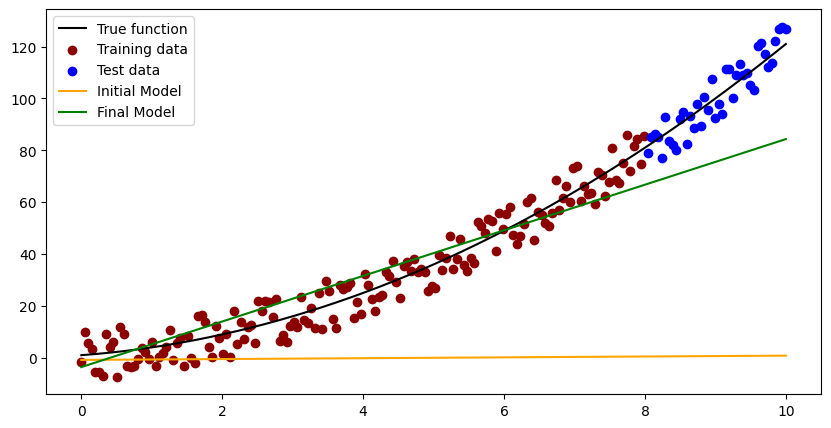

In [26]:
y_initial = [linear_model(p, w_history[0], b_history[0]) for p in x]
y_final = [linear_model(p, w_history[-1], b_history[-1]) for p in x]

plt.figure(figsize=(10, 5))
plt.plot(x, y_true, color='black', label='True function')
plt.scatter(x_train, y_train, color='darkred', label='Training data')
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.plot(x, y_initial, label='Initial Model', color='orange')
plt.plot(x, y_final, label='Final Model', color='green')
plt.legend()
plt.savefig('final-model.png')
plt.show()

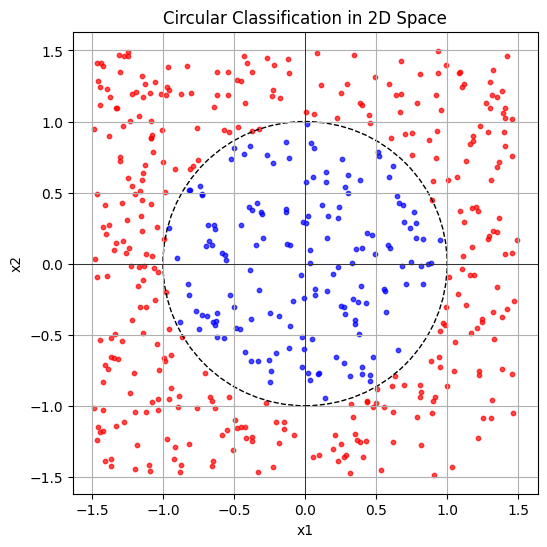

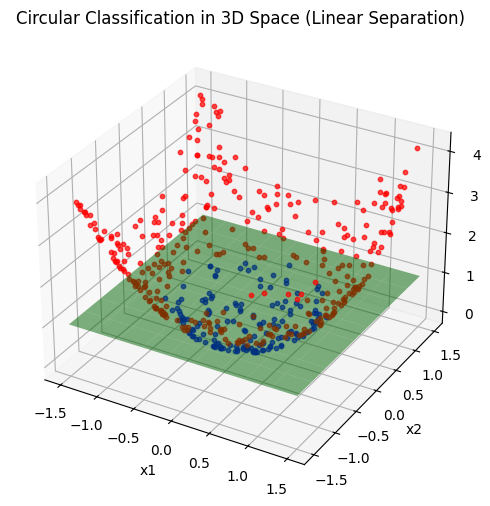

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate circular data
np.random.seed(42)
n_samples = 500
radius = 1.0

# Generate random points in 2D space
X = np.random.uniform(-1.5, 1.5, (n_samples, 2))

# Assign class based on distance from origin
y = np.array([1 if np.linalg.norm(point) < radius else 0 for point in X])

# 2D Visualization
fig, ax = plt.subplots(figsize=(6, 6))
for point, label in zip(X, y):
    color = 'blue' if label == 1 else 'red'
    ax.scatter(point[0], point[1], color=color, s=10, alpha=0.7)
circle = plt.Circle((0, 0), radius, color='black', fill=False, linestyle='--')
ax.add_artist(circle)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title("Circular Classification in 2D Space")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_aspect('equal', adjustable='datalim')
plt.grid()
plt.savefig('circular-data.png')
plt.show()

# Map data to a higher-dimensional space: z = x1^2 + x2^2
z = np.sum(X**2, axis=1).reshape(-1, 1)
X_3D = np.hstack((X, z))

# 3D Visualization
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for point, label in zip(X_3D, y):
    color = 'blue' if label == 1 else 'red'
    ax.scatter(point[0], point[1], point[2], color=color, s=10, alpha=0.7)
ax.set_title("Circular Classification in 3D Space (Linear Separation)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("z = x1^2 + x2^2")

# Add a separating plane
xx, yy = np.linspace(-1.5, 1.5, 10), np.linspace(-1.5, 1.5, 10)
XX, YY = np.meshgrid(xx, yy)
ZZ = radius**2 * np.ones_like(XX)
ax.plot_surface(XX, YY, ZZ, alpha=0.5, color='green')
plt.savefig('circular-data-3d.png')
plt.show()


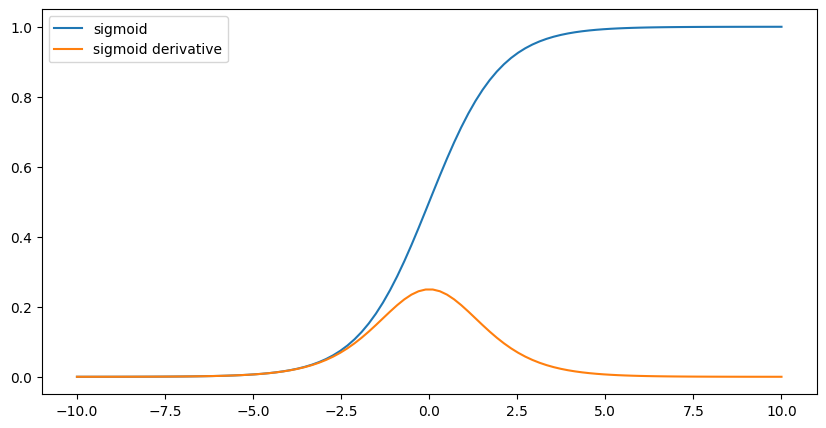

In [23]:
# Activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Plot 
z = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 5))
plt.plot(z, sigmoid(z), label='sigmoid')
plt.plot(z, sigmoid_derivative(z), label='sigmoid derivative')
plt.legend()
plt.savefig('sigmoid.png')
plt.show()


Epoch 0, Loss: 1638.6673807594236
Epoch 1000, Loss: 103.2208471378816
Epoch 2000, Loss: 61.6888859179149
Epoch 3000, Loss: 56.39682153646079
Epoch 4000, Loss: 54.36120523445983
Epoch 5000, Loss: 58.60854538607292
Epoch 6000, Loss: 57.47923140860534
Epoch 7000, Loss: 55.84181902963694
Epoch 8000, Loss: 53.32970842304687
Epoch 9000, Loss: 50.00937395054177


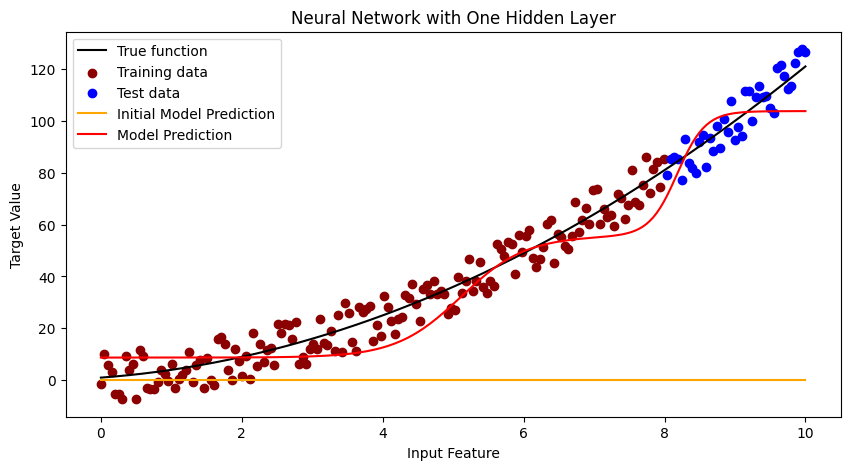

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Reshape data for neural network
x = x.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Initialize parameters
input_dim = x.shape[1]  # Number of input features
hidden_dim = 2         # Number of neurons in the hidden layer
output_dim = y_data.shape[1]  # Number of output neurons

# Weights and biases
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

# Fetch initial model predictions
Z1 = np.dot(x, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred_initial = Z2

# Learning rate
alpha = 0.01

# Training loop
epochs = 10000
m = x.shape[0]  # Number of training examples
loss_history = []

for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(x, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2  # Linear activation for output layer

    # Compute loss (Mean Squared Error)
    loss = (1 / (2 * m)) * np.sum((y_pred - y_data) ** 2)
    loss_history.append(loss)

    # Backward propagation
    dZ2 = y_pred - y_data
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = (1 / m) * np.dot(x.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    # Update parameters
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 =  b2 - alpha * db2

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Predictions
Z1 = np.dot(x, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred = Z2

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x, y_true, color='black', label='True function')
plt.scatter(x_train, y_train, color='darkred', label='Training data')
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.plot(x, y_pred_initial, label='Initial Model Prediction', color='orange')
plt.plot(x, y_pred, label='Model Prediction', color='red')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.title('Neural Network with One Hidden Layer')
plt.legend()
plt.savefig('neural-network1.png')
plt.show()


Epoch 0, Loss: 1640.9238288719946
Epoch 1000, Loss: 51.000043262079124
Epoch 2000, Loss: 34.635437754998655
Epoch 3000, Loss: 28.013732425521553
Epoch 4000, Loss: 24.80182540169102
Epoch 5000, Loss: 22.862125518622207
Epoch 6000, Loss: 21.511763189680025
Epoch 7000, Loss: 20.54430494330906
Epoch 8000, Loss: 19.839340035870396
Epoch 9000, Loss: 19.305798344202046


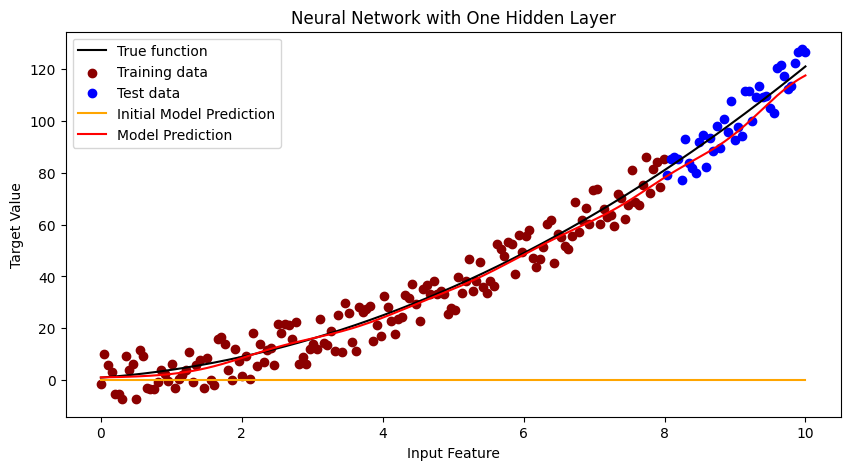

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Reshape data for neural network
x = x.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Initialize parameters
input_dim = x.shape[1]  # Number of input features
hidden_dim = 10         # Number of neurons in the hidden layer
output_dim = y_data.shape[1]  # Number of output neurons

# Weights and biases
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

# Fetch initial model predictions
Z1 = np.dot(x, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred_initial = Z2

# Learning rate
alpha = 0.01

# Training loop
epochs = 10000
m = x.shape[0]  # Number of training examples
loss_history = []

for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(x, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2  # Linear activation for output layer

    # Compute loss (Mean Squared Error)
    loss = (1 / (2 * m)) * np.sum((y_pred - y_data) ** 2)
    loss_history.append(loss)

    # Backward propagation
    dZ2 = y_pred - y_data
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = (1 / m) * np.dot(x.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    # Update parameters
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Predictions
Z1 = np.dot(x, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred = Z2

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x, y_true, color='black', label='True function')
plt.scatter(x_train, y_train, color='darkred', label='Training data')
plt.scatter(x_test, y_test, color='blue', label='Test data')
plt.plot(x, y_pred_initial, label='Initial Model Prediction', color='orange')
plt.plot(x, y_pred, label='Model Prediction', color='red')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.title('Neural Network with One Hidden Layer')
plt.legend()
plt.savefig('neural-network2.png')
plt.show()


In [55]:
# Import iris dataset using seaborn
import seaborn as sns
data = sns.load_dataset('tips')
# convert total_bill and tip to 2 decimal places
data['total_bill'] = data['total_bill'].apply(lambda x: round(x, 2))
data['tip'] = data['tip'].apply(lambda x: round(x, 2))
# Display the first 5 rows with up to 2 decimal places in the float columns
print(data.sample(5).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrllllr}
\toprule
total_bill & tip & sex & smoker & day & time & size \\
\midrule
17.81 & 2.34 & Male & No & Sat & Dinner & 4 \\
40.55 & 3.00 & Male & Yes & Sun & Dinner & 2 \\
18.64 & 1.36 & Female & No & Thur & Lunch & 3 \\
26.41 & 1.50 & Female & No & Sat & Dinner & 2 \\
15.98 & 2.03 & Male & No & Thur & Lunch & 2 \\
\bottomrule
\end{tabular}



In [56]:
data['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [57]:
# Label Encode the `day` column.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['day_LabelEncoded'] = le.fit_transform(data['day'])

# Save the encoder to a pickle file 
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print(data.sample(5).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrllllrr}
\toprule
total_bill & tip & sex & smoker & day & time & size & day_LabelEncoded \\
\midrule
9.94 & 1.56 & Male & No & Sun & Dinner & 2 & 2 \\
12.66 & 2.50 & Male & No & Sun & Dinner & 2 & 2 \\
12.69 & 2.00 & Male & No & Sat & Dinner & 2 & 1 \\
8.77 & 2.00 & Male & No & Sun & Dinner & 2 & 2 \\
16.43 & 2.30 & Female & No & Thur & Lunch & 2 & 3 \\
\bottomrule
\end{tabular}



In [66]:
data['time']

0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Name: time, Length: 244, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

In [59]:
# Ordinal encode the `day` column
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun']])
data['day_OrdinalEncoded'] = oe.fit_transform(data[['day']])
# to integer
data['day_OrdinalEncoded'] = data['day_OrdinalEncoded'].astype(int)

# Save the encoder to a pickle file
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(oe, f)

print(data.sample(5).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrllllrrr}
\toprule
total_bill & tip & sex & smoker & day & time & size & day_LabelEncoded & day_OrdinalEncoded \\
\midrule
10.77 & 1.47 & Male & No & Sat & Dinner & 2 & 1 & 2 \\
43.11 & 5.00 & Female & Yes & Thur & Lunch & 4 & 3 & 0 \\
20.29 & 3.21 & Male & Yes & Sat & Dinner & 2 & 1 & 2 \\
20.08 & 3.15 & Male & No & Sat & Dinner & 3 & 1 & 2 \\
19.65 & 3.00 & Female & No & Sat & Dinner & 2 & 1 & 2 \\
\bottomrule
\end{tabular}



In [64]:
# One-Hot encode the `day` column
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
ohe = OneHotEncoder(sparse_output=False,categories=[['Thur', 'Fri', 'Sat', 'Sun']])
day_ohe = ohe.fit_transform(data[['day']])
day_ohe_df = pd.DataFrame(day_ohe, columns=[f'day_{day}' for day in ohe.categories[0]])
# Convert the one-hot encoded columns to integers
day_ohe_df = day_ohe_df.astype(int)
# Merge the one-hot encoded columns with the original dataframe
data_ohe = pd.concat([data, day_ohe_df], axis=1)

print(data_ohe[['total_bill','tip','sex','smoker','day','time','size','day_Thur','day_Fri','day_Sat','day_Sun']].sample(5).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrllllrrrrr}
\toprule
total_bill & tip & sex & smoker & day & time & size & day_Thur & day_Fri & day_Sat & day_Sun \\
\midrule
12.60 & 1.00 & Male & Yes & Sat & Dinner & 2 & 0 & 0 & 1 & 0 \\
13.42 & 1.68 & Female & No & Thur & Lunch & 2 & 1 & 0 & 0 & 0 \\
10.07 & 1.83 & Female & No & Thur & Lunch & 1 & 1 & 0 & 0 & 0 \\
23.95 & 2.55 & Male & No & Sun & Dinner & 2 & 0 & 0 & 0 & 1 \\
16.43 & 2.30 & Female & No & Thur & Lunch & 2 & 1 & 0 & 0 & 0 \\
\bottomrule
\end{tabular}



In [1]:
# Import iris dataset using seaborn
import seaborn as sns
data = sns.load_dataset('tips')

# One-Hot encode the `day` column
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
ohe = OneHotEncoder(sparse_output=False,categories=[['Thur', 'Fri', 'Sat', 'Sun']])
day_ohe = ohe.fit_transform(data[['day']])
day_ohe_df = pd.DataFrame(day_ohe, columns=[f'day_{day}' for day in ohe.categories[0]])
# Convert the one-hot encoded columns to integers
day_ohe_df = day_ohe_df.astype(int)
# Merge the one-hot encoded columns with the original dataframe
data = pd.concat([data, day_ohe_df], axis=1)

# LabelEncode the `sex` column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex_encoded'] = le.fit_transform(data['sex'])
# Print the transformation of the `sex` column
print('sex encoding:')
print(f"Male: {le.transform(['Male'])} Female: {le.transform(['Female'])}\n")

# LabelEncode the `smoker` column
data['smoker_encoded'] = le.fit_transform(data['smoker'])
# Print the transformation of the `smoker` column
print('smoker encoding:')
print(f"Yes: {le.transform(['Yes'])} No: {le.transform(['No'])}\n")

# LabelEncode the `time` column
data['time_encoded'] = le.fit_transform(data['time'])
# Print the transformation of the `time` column
print('time encoding:')
print(f"Lunch: {le.transform(['Lunch'])} Dinner: {le.transform(['Dinner'])} \n")

features = ['total_bill','sex_encoded','smoker_encoded','time_encoded','day_Thur','day_Fri','day_Sat','day_Sun','size']
target = 'tip'

print(data[features + [target]].sample(5).to_latex())

sex encoding:
Male: [1] Female: [0]

smoker encoding:
Yes: [1] No: [0]

time encoding:
Lunch: [1] Dinner: [0] 

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & total_bill & sex_encoded & smoker_encoded & time_encoded & day_Thur & day_Fri & day_Sat & day_Sun & size & tip \\
\midrule
99 & 12.460000 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 2 & 1.500000 \\
177 & 14.480000 & 1 & 1 & 0 & 0 & 0 & 0 & 1 & 2 & 2.000000 \\
24 & 19.820000 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 2 & 3.180000 \\
15 & 21.580000 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 2 & 3.920000 \\
77 & 27.200000 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 4 & 4.000000 \\
\bottomrule
\end{tabular}



In [10]:
X = data[features].values
print(f'Shape of X: {X.shape}')

y = data[target].values
print(f'Shape of y: {y.shape}')

# Initialize random weight and bias for a linear model
import numpy as np
W = np.random.randn(X.shape[1])
print(f'Shape of W: {W.shape}')

b = np.random.randn(1)
print(f'Shape of b: {b.shape}')

Shape of X: (244, 9)
Shape of y: (244,)
Shape of W: (9,)
Shape of b: (1,)


In [12]:
W

array([ 0.32602863,  1.54460826,  0.3783322 , -0.04860745,  1.40069738,
       -0.37730546, -0.77637999,  0.86649921,  1.18256166])